# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read csv
data = pd.read_csv("churn.csv")
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
data.describe(include='all')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


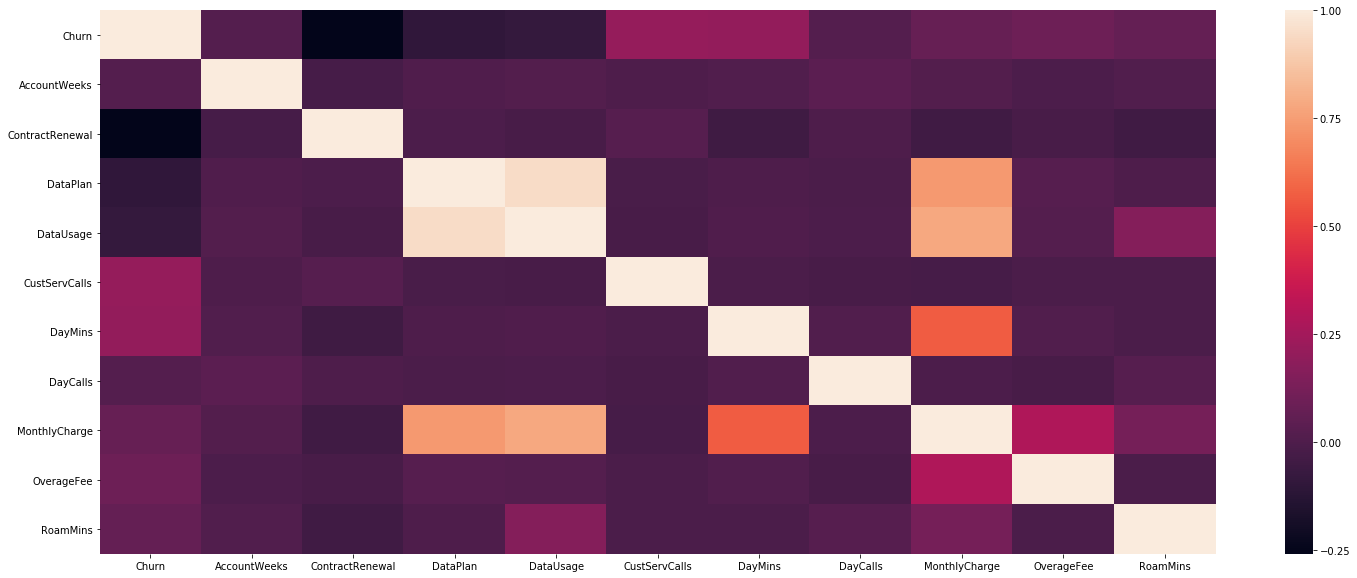

In [8]:
#Checking for correlated features
import seaborn as sns
corr = data.corr()
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(corr)
plt.close(2)
plt.close(3)

DataPlan and DataUsage are highly correlated

In [9]:
# Analyse missing values
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

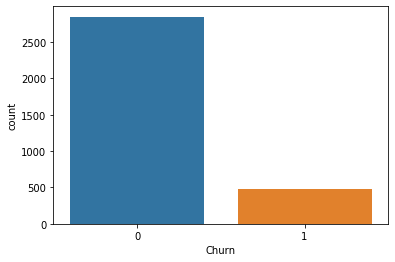

In [11]:
# Our label Distribution (countplot)
sns.countplot('Churn', data=data)

In [30]:
#Number of Customer that left
len(data[data['Churn']==1])

483

In [26]:
#Number of Customer that remained
len(data[data['Churn']==0])

2850

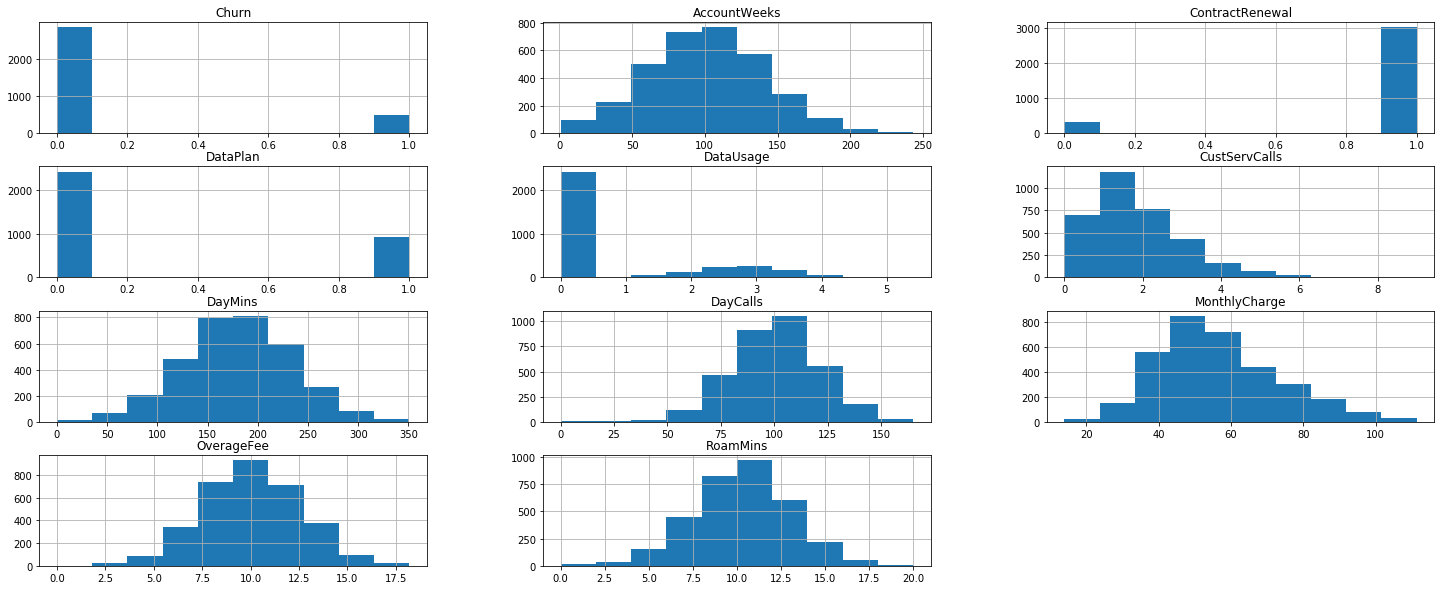

In [34]:
# Example EDA
data.hist(figsize=(25,10))
plt.show()

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [13]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [20]:
#Checking for outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
pd.DataFrame(z, columns=data.columns)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.411672,0.676489,0.327580,1.617086,1.480204,0.427932,1.566767,0.476643,1.990727,0.071584,0.085008
1,0.411672,0.149065,0.327580,1.617086,2.266072,0.427932,0.333738,1.124503,1.564510,0.107082,1.240482
2,0.411672,0.902529,0.327580,0.618396,0.641642,1.188218,1.168304,0.675985,0.262133,1.574346,0.703121
3,0.411672,0.428590,3.052685,0.618396,0.641642,0.332354,2.196596,1.466936,0.042307,2.741846,1.303026
4,0.411672,0.654629,3.052685,0.618396,0.641642,1.092641,0.240090,0.626149,0.931902,1.037927,0.049184
...,...,...,...,...,...,...,...,...,...,...,...
3328,0.411672,2.283878,0.327580,1.617086,1.456628,0.332354,0.432895,1.167924,0.937363,0.287344,0.120832
3329,0.411672,0.830437,0.327580,0.618396,0.374447,1.092641,0.942447,2.164631,0.005775,0.939320,0.228304
3330,0.411672,1.835055,0.327580,0.618396,0.641642,0.332354,0.018820,0.426808,0.018581,1.730942,1.383778
3331,0.411672,2.082955,3.052685,0.618396,0.641642,0.332354,0.624778,0.227466,0.383909,0.817048,1.876211


In [21]:
#Checking number of rows that contain data that might have outliers
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

414

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [42]:
#Undersampling data to balance the dataset

churn_df = data.loc[data['Churn'] == 1]
non_churn_df = data.loc[data['Churn'] == 0].sample(n=483)
churn_data = pd.concat([churn_df, non_churn_df], axis=0)

In [80]:
X = churn_data.iloc[:,1:]
y = churn_data.iloc[:,:1]

Baseline model

In [81]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.7529465748934775
Test accuracy: 0.7448275862068966


In [49]:
#Removal of outliers

new_df = data.drop(outliers,axis = 0).reset_index(drop = False)
new_df

,index,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
4,8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
2915,3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
2917,3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [51]:
len(new_df[new_df['Churn']==1])

321

In [52]:
len(new_df[new_df['Churn']==0])

2598

In [54]:
#Balancing dataset with outliers removed

nchurn_df = data.loc[data['Churn'] == 1]
nnon_churn_df = data.loc[data['Churn'] == 0].sample(n=321)
nchurn_data = pd.concat([nchurn_df, nnon_churn_df], axis=0)

X_new = nchurn_data.iloc[:,1:]
y_new = nchurn_data.iloc[:,:1]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.7437137330754352
Test accuracy: 0.743801652892562


Training and test accuracy regressed after removing of outliers

In [84]:
#Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_strain = scaler.fit_transform(X_train) 
X_stest = scaler.transform(X_test)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_strain,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_stest,y_test)))

Mean training accuracy: 0.7366025713960633
Test accuracy: 0.7603305785123967


Training accuracy regressed even further but test accuracy increased marginally

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

In [87]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, ElasticNet, Lasso


model_1 = RandomForestClassifier()
model_2 = GradientBoostingClassifier()
model_3 = XGBClassifier()
model_4 = DecisionTreeClassifier()
model_5 = SVC()
model_6 = BaggingClassifier()
model_7 = AdaBoostClassifier()
model_8 = ElasticNet()
model_9 = LGBMClassifier()
model_10 = CatBoostClassifier()
 
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10]

In [90]:
#Comparing accuracy across models
for i in range(0, len(models)):
    cv = cross_validate(models[i],X_strain,y_train,cv = 3, n_jobs=-1, return_estimator=True)
    print(i+1, "Mean training accuracy: {}".format(np.mean(cv['test_score'])),
          '\t', "Test accuracy: {}".format(cv["estimator"][0].score(X_stest,y_test)))

1 Mean training accuracy: 0.8042818674858725 	 Test accuracy: 0.7933884297520661
2 Mean training accuracy: 0.8131755603595403 	 Test accuracy: 0.8099173553719008
3 Mean training accuracy: 0.8167216596503205 	 Test accuracy: 0.8057851239669421
4 Mean training accuracy: 0.7597849584708157 	 Test accuracy: 0.7644628099173554
5 Mean training accuracy: 0.8185041908446165 	 Test accuracy: 0.8264462809917356
6 Mean training accuracy: 0.8060738802290742 	 Test accuracy: 0.7851239669421488
7 Mean training accuracy: 0.7722057875374521 	 Test accuracy: 0.7851239669421488
8 Mean training accuracy: -0.0005443041643105792 	 Test accuracy: -0.0017970097757331605
9 Mean training accuracy: 0.8060738802290742 	 Test accuracy: 0.8016528925619835
10 Mean training accuracy: 0.8256248340728942 	 Test accuracy: 0.8140495867768595


Catboost and SVC did much better than most models

In [113]:
from sklearn.metrics import classification_report
cv = cross_validate(CatBoostClassifier(),X_strain,y_train,cv = 3, n_jobs=-1, return_estimator=True)
print(classification_report(y_test, cv["estimator"][0].predict(X_stest)))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        94
           1       0.88      0.80      0.84       148

    accuracy                           0.81       242
   macro avg       0.81      0.82      0.81       242
weighted avg       0.82      0.81      0.82       242



In [114]:
cv = cross_validate(SVC(),X_strain,y_train,cv = 3, n_jobs=-1, return_estimator=True)
print(classification_report(y_test, cv["estimator"][0].predict(X_stest)))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        94
           1       0.84      0.88      0.86       148

    accuracy                           0.83       242
   macro avg       0.82      0.81      0.82       242
weighted avg       0.83      0.83      0.83       242



In [111]:
param_grid = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001],
              'kernel':['linear','rbf', 'poly', 'sigmoid']}


svc_model = SVC()

model_search = GridSearchCV(svc_model, param_grid=param_grid, cv=5,
                            verbose=False, refit=True, scoring='f1', n_jobs=-1,
                            return_train_score=True)

model_search.fit(X_strain,y_train)

print ('Best: %f using %s' % (model_search.best_score_, model_search.best_params_))
print ('\n Best estimator:\n', model_search.best_estimator_)

Best: 0.849804 using {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

 Best estimator:
 SVC(C=1, gamma=0.1)


C:\Users\Huleji\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.05, 0.01, 0.001, 0.025],
              'depth': [2, 4, 6, 8, 10],
              'n_estimators':[50, 100, 250, 300, 500, 750]}


asdf_model = CatBoostClassifier()

model_search = GridSearchCV(asdf_model, param_grid=param_grid, cv=5,
                            verbose=False, refit=True, scoring='f1', n_jobs=-1,
                            return_train_score=True)

model_search.fit(X_strain,y_train, eval_set=(X_stest,y_test), verbose = False)

print ('Best: %f using %s' % (model_search.best_score_, model_search.best_params_))
print ('\n Best estimator:\n', model_search.best_estimator_)

Best: 0.868284 using {'depth': 8, 'learning_rate': 0.1, 'n_estimators': 100}

 Best estimator:


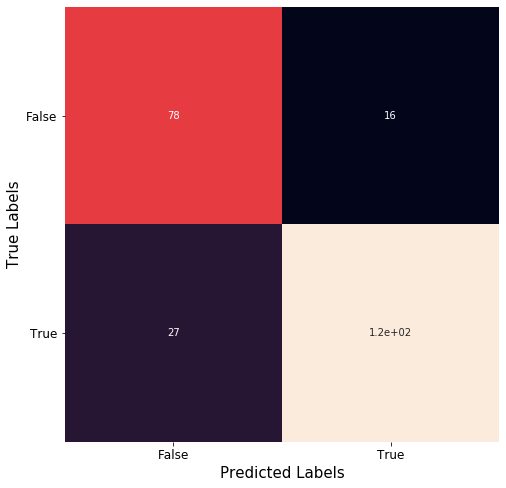

In [103]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = model_search.best_estimator_.predict(X_stest)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()